Classification in order is: underweight, normal, over1, over2, obes1, obes2, obes3

K = 1
[[187  36]
 [ 29 170]]

K = 100
[[138  85]
 [ 24 175]]

K = 3
[[185  38]
 [ 30 169]]



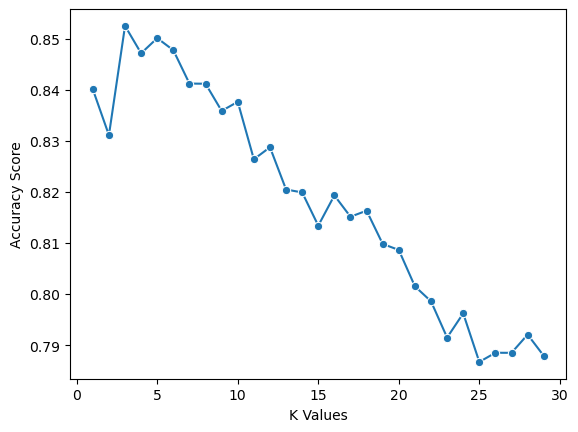

In [3]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

# df = pd.read_csv('BMI_MasterData.csv')
df = pd.read_csv('BMI_ClassRedone.csv')


df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['BMI'].round(decimals=1)

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xtrain, ytrain)

Xtrain_selected = Xtrain
Xtest_selected = Xtest

ypred_selected = neigh.predict(Xtest_selected)
print('Classification in order is: underweight, normal, over1, over2, obes1, obes2, obes3')
print()

cmr_selected = confusion_matrix(ytest, ypred_selected)
print('K = 1')
print(cmr_selected)
print()


neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(Xtrain, ytrain)

Xtrain_selected = Xtrain
Xtest_selected = Xtest

ypred_selected = neigh.predict(Xtest_selected)

cmr_selected = confusion_matrix(ytest, ypred_selected)
print('K = 100')
print(cmr_selected)
print()

k_values = [i for i in range (1,30)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, Xtrain, ytrain, cv=20)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(Xtrain, ytrain)

Xtrain_selected = Xtrain
Xtest_selected = Xtest

ypred_selected = neigh.predict(Xtest_selected)

cmr_selected = confusion_matrix(ytest, ypred_selected)
print('K = 3')
print(cmr_selected)
print()


In [5]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

# df = pd.read_csv('BMI_MasterData.csv')
df = pd.read_csv('BMI_ClassRedone.csv')


df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['BMI'].round(decimals=1)

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# neigh = KNeighborsClassifier(n_neighbors=1)
# neigh.fit(Xtrain, ytrain)

# Xtrain_selected = Xtrain
# Xtest_selected = Xtest

rfe_method = RFE(estimator=KNeighborsClassifier(n_neighbors=6), n_features_to_select=7)
rfe_method.fit(Xtrain, ytrain)

Xtrain_selected = rfe_method.transform(Xtrain)
Xtest_selected = rfe_method.transform(Xtest)

ypred_selected = neigh.predict(Xtest_selected)
# print('Classification in order is: underweight, normal, over1, over2, obes1, obes2, obes3')
print()

cmr_selected = confusion_matrix(ytest, ypred_selected)
print('K = 1')
print(cmr_selected)
print()




ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.